<h1 style=font-size:40px>An Exporation into the Variables Affecting Student Alcohol Consumption and Grades</h1>
<h3>Benjamin Aranoff, Natan Oliff, Elisheva Zak</h3>

# Introduction

For our project we aquired our <a href ="https://www.kaggle.com/uciml/student-alcohol-consumption">dataset</a> from the website <a href = "https://www.kaggle.com/">Kaggle</a>. Kaggle is a leading website in the data science community and a central location for both datasets as well as data science competitions. We went through many datasets to find the right one for our project and ultimately settled on the "Student Alcohol Consumption" dataset. According to the creator, "The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students." The paper that our data is based off is located here: http://www3.dsi.uminho.pt/pcortez/student.pdf. However, we did not use the paper to find any of our conclusions, as we wanted to go through the full process of finding relevant data. We will first look for factors such as a students social activity and social and economic status. Then we will see how they correlate with final grades and alcohol consumption. The main focus of our research is to find out whether or not we can predict a students final grades as well as a student's alcohol consumption. We hypothesize that students who are more social will also be more likely to drink more, while students with better upbringing will achieve higher grades.

We reccomend coding Python 3, as we did. We used multiple imported libraries, primarily: <a href="https://pandas.pydata.org/pandas-docs/stable/">pandas</a>, <a href ="https://docs.scipy.org/doc/numpy/user/">numpy</a>, <a href = "https://scikit-learn.org/stable/">scikit-learn</a>, and <a href = "https://seaborn.pydata.org/">seaborn</a>.

In [46]:
# In order to complete this tutorial, you will need these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import linear_model
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
import warnings
warnings.filterwarnings('ignore')

Our tutorial focuses specifically on students in a portugese class, however, there is also data on students in a math class. We decided to look only at the portugese class for our analysis. This is because there are duplicate students between the two classes, and if you decided to use both data sets you would have to merge duplicates or take into account during your analysis that there are duplicates. Because of this, and because the total amount of students once duplicates have been merged is not significantly higher than the number of students in the portugese class, we decided to use the portugese set for our analysis. However, when you are analyzing the data, feel free to choose whatever data you want, as long as you keep the duplicates in mind.

In [47]:
data = pd.read_csv("student-por.csv")

# Tidying the Data

Our table has a lot of columns, which is great for us, since we want as much information as possible so we can atttempt to find as many interesting correlations as possible. However, our table can be a bit confusing, so for a full explanation of each column and what it includes, please visit <a href="https://www.kaggle.com/uciml/student-alcohol-consumption">Student Alcohol Consumption Data</a> (which is the source of our data).

## Drop irrelevant columns

* Because there are so many columns, we will not end up using all of them in this tutorial, so for clarity we have dropped the ones we did not use. When you perform your analysis, you may decide you want to use certain columns that we have dropped, and then you can drop whichever columns you do not use.

In [48]:
data = data.drop(columns = ['school','address','famsize','Pstatus','reason','guardian','traveltime','health', 'studytime',\
    'schoolsup','famsup', 'famrel', 'absences'])

## Rename Vague Columns

* Although we previously linked an explanation for each column and what it contains, there were still some column titles that we felt were unintuitive, so we gave them clearer names. You can rename any columns whose names you think are vague or mislabelled.
* Often when performing analysis it is easier to use numbers than strings, and many columns here have a binary answer of either 'yes' or 'no'. Replace those with 1s and 0s so that they will be easier to analyze later.

In [49]:
data = data.rename(columns={"goout": 'social_activity', 'Dalc' : 'Weekday_alc', 'Walc' : 'Weekend_alc'})
data = data.replace('yes', 1).replace('no', 0)

In [50]:
data.head()

,sex,age,Medu,Fedu,Mjob,Fjob,failures,paid,activities,nursery,higher,internet,romantic,freetime,social_activity,Weekday_alc,Weekend_alc,G1,G2,G3
0,F,18,4,4,at_home,teacher,0,0,0,1,1,0,0,3,4,1,1,0,11,11
1,F,17,1,1,at_home,other,0,0,0,0,1,1,0,3,3,1,1,9,11,11
2,F,15,1,1,at_home,other,0,0,0,1,1,1,0,3,2,2,3,12,13,12
3,F,15,4,2,health,services,0,0,1,1,1,1,1,2,2,1,1,14,14,14
4,F,16,3,3,other,other,0,0,0,1,1,0,0,3,2,1,2,11,13,13


# Exploratory Data Analysis

## Social participation
* We theorize that social participation has a significant correlation to alcohol usage, so we will start by analyzing each student's social participation.
* We attempt to quantify a student's social experience between 1 and 7, where 1 is the least socially active and 7 is the most. This is based on a student's romantic status, their extra-curricular particiaption, and their social activities outside of school.

* First, look at the quantity of students who participate in each social activity.

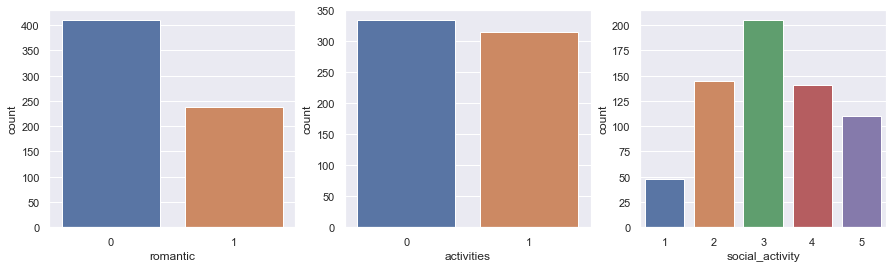

In [51]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.countplot(x='romantic', data=data, ax=ax[0])
sns.countplot(x='activities', data=data, ax=ax[1])
sns.countplot(x='social_activity', data=data, ax=ax[2])

* Next, add a column in our data table that will keep track of each student's total social participation, which we can later use to analyze social participation as a whole and its affect on other variables.

In [52]:
data['social_participation'] = data['romantic'] + data['activities'] + data['social_activity']
data.head()

,sex,age,Medu,Fedu,Mjob,Fjob,failures,paid,activities,nursery,...,internet,romantic,freetime,social_activity,Weekday_alc,Weekend_alc,G1,G2,G3,social_participation
0,F,18,4,4,at_home,teacher,0,0,0,1,...,0,0,3,4,1,1,0,11,11,4
1,F,17,1,1,at_home,other,0,0,0,0,...,1,0,3,3,1,1,9,11,11,3
2,F,15,1,1,at_home,other,0,0,0,1,...,1,0,3,2,2,3,12,13,12,2
3,F,15,4,2,health,services,0,0,1,1,...,1,1,2,2,1,1,14,14,14,4
4,F,16,3,3,other,other,0,0,0,1,...,0,0,3,2,1,2,11,13,13,2


## Socioeconomic Status

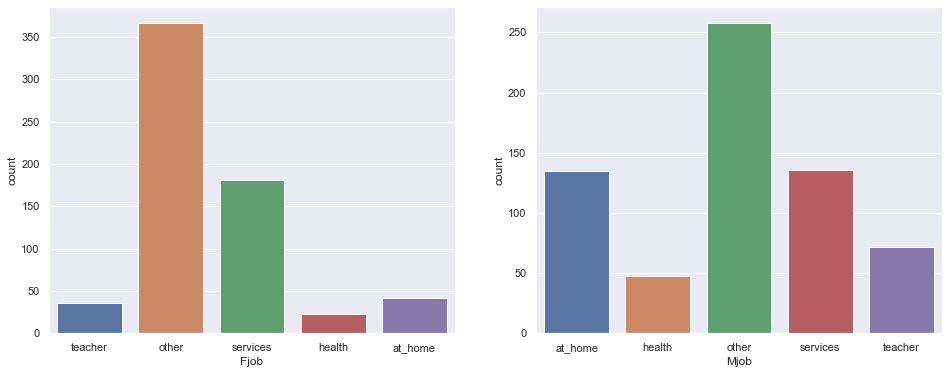

In [53]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
data['parents_edu'] = (data['Fedu'] + data['Medu'])/2
sns.countplot(x = 'Fjob' , data = data, ax=ax[0])
sns.countplot(x = 'Mjob', data = data, ax=ax[1])

Here, we just want to look at demographic of the school class provided in the data set. First, I listed the jobs of parents. Unforunately, it seems that this question does not provide much info, as a large majority of students' responded other. The second most common option selected was service jobs. These service jobs refer to civil service such as administrative services or police services. It is also interesting to note that a solidly large portion of mothers were stay at home moms. 

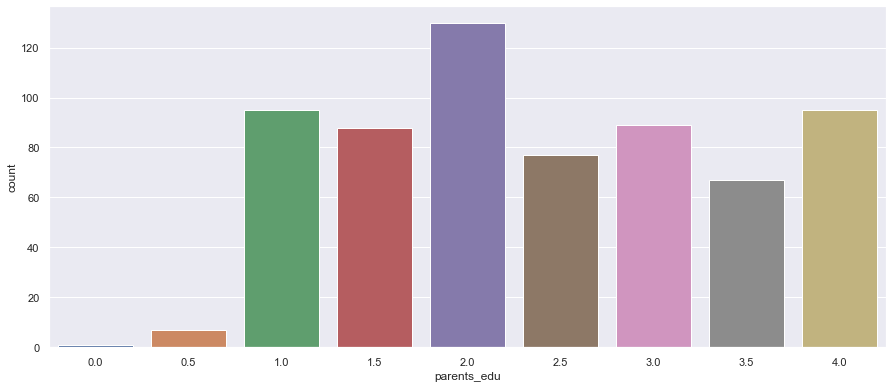

In [54]:
sns.set(rc={'figure.figsize':(15,6.27)})
sns.countplot(x = 'parents_edu', data = data)

The parents education variable provides better information. The above graph list parents_edu which is the average of the mother's education and the father's education levels. Each parent reponded on a scale of 0-4 where:
* 0 - none
* 1 - 4th grade
* 2 - 5th to 9th grade
* 3 - high school
* 4 - higher education
Only about 160 students have at least one parent who attended higher education. More than half the students have one parent who did not even complete high school. It seems seems here that we are dealing with students who come from homes that are not very well educated.

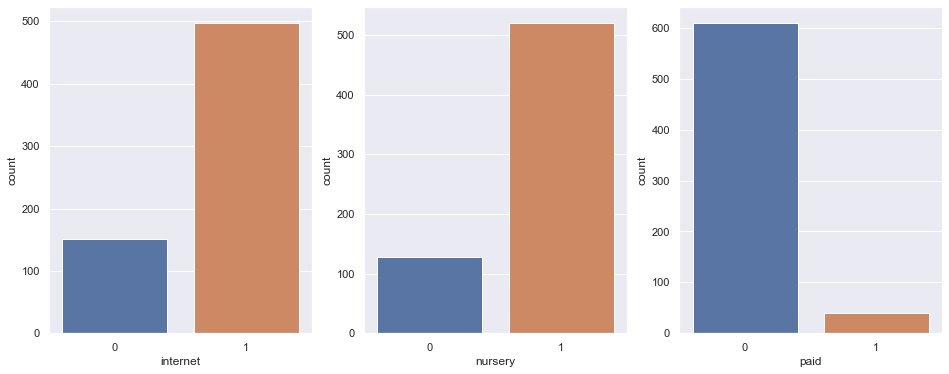

In [55]:
_ , ax = plt.subplots(1,3, figsize=(16,6))
sns.countplot(x = 'internet', data = data, ax = ax[0])
sns.countplot(x = 'nursery', data = data, ax = ax[1])
sns.countplot(x = 'paid', data = data, ax = ax[2])

Next, we look at other data to try and get a sense of the socioeconmic status of the students. Most students have internet at home and also attended nursery school. However, there is a still a significant population that either did not attend nursery school or does not have internet at home, which are pretty basic needs and are another indicator that we are dealing with a population that has low socioeconomic status. Also, almost not students recieved extra paid help, another indicator that these students come from families that cannot afford paying tutors and extra help.

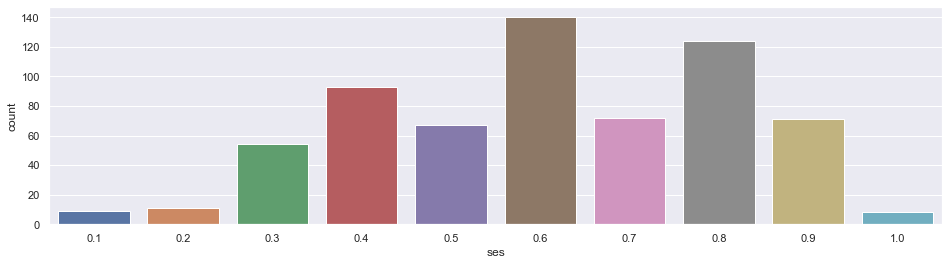

In [56]:
plt.subplots(figsize=(16,4))
data['ses'] = round(0.5 * (data['parents_edu']/4) +\
              0.2 * data['internet'] + \
              0.2 * data['nursery'] +\
              0.1 * data['paid'], 1)

sns.countplot(x = 'ses', data = data)

Here I create a variable to capture the socioeconmic status of the students. I made the variable on a scale from 0 to 1. I weighted parent's education the most when considering socioeconomic status, as education is a strong predictor of SES. I assigned some weight to the internet, nursery, and tutoring variables, but not as much.

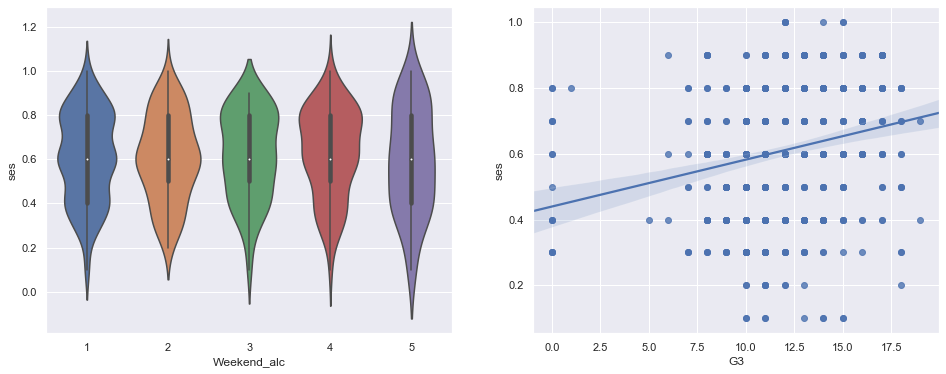

In [57]:
_ , ax = plt.subplots(1,2,figsize=(16,6))
sns.violinplot(x = 'Weekend_alc', y = 'ses', data = data, ax = ax[0])
sns.regplot(x = 'G3', y = 'ses', data = data, ax = ax[1])

Here I plot SES vs other factors. There seems to be little correlation between SES and alchohol consumption, which makes sense. There is no reason why wealth should factor in to the consumption of alchohol. Similarly, there seems to be little to no correlation between social participation and SES, as social participation is a basic human need and not really dependent on SES. However, there seems to be a small but significant positive correlation betweeen grades and SES. This makes sense, especially as my SES variable is highly dependent on the student's parents' education. Educated parents either means that there the parents are smart and can pass on those genes to their children, the parents have the resources to help educated their children, or the parents care about and emphasize education.

## Correlation Exploration - Weekend Alcohol Use

Now we will take a look at how social participation affects weekend alcohol consumption. Remember, social participation is made up of romantic status, extra-curricular particiaption, and social activities outside of school. As you can see, there is a strong correlation between a student's social participation level and their weekend alcohol consumption.
Furthermore, weekday and weekend alcohol are strongly correlated. It seems people who drink sometimes, drink all the time.

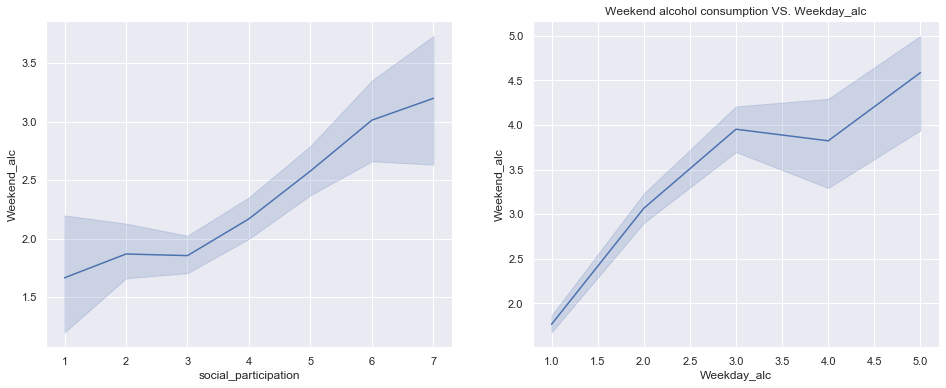

In [58]:
i=0
_ , ax = plt.subplots(1,2, figsize=(16,6))
for col in ['social_participation','Weekday_alc']:
    x = col
    y = data.Weekend_alc
    plt.title("Weekend alcohol consumption VS. " + col)
    sns.lineplot(x=data[x], y=y, ax = ax[i])
    i+=1

## Correlation Exploration - Grades

The below charts display the correlations between final grades and multiple other variables. We chose to use final grades as opposed to semester 1 and semester 2 grades because it is a more encompassing variable. As you can see, at first glance there is minimal correlation. This is deceiving and a result of violin plots. Violin plots will zoom out in order to display the min and max, and show limited visual correlation.

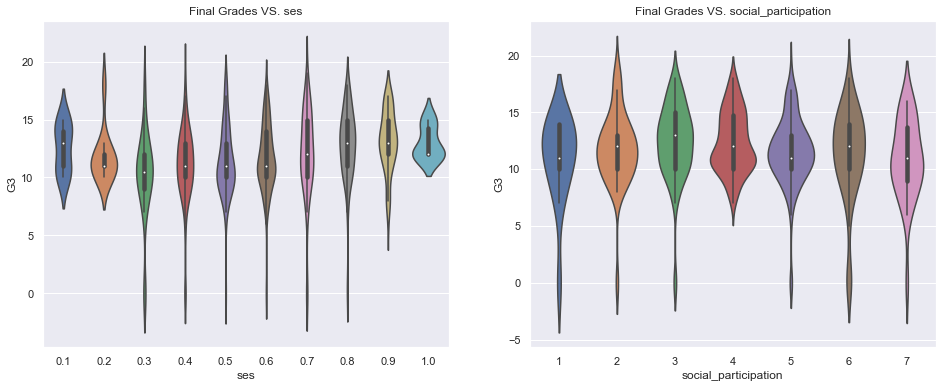

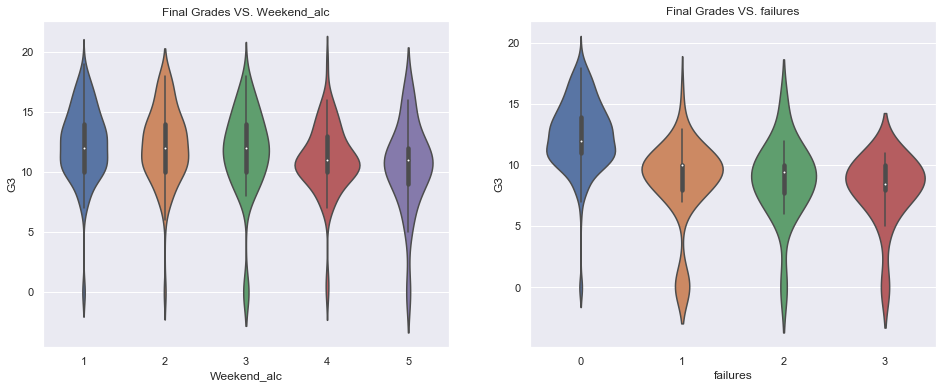

In [59]:
i = 0
check = True
_ , ax = plt.subplots(1,2, figsize=(16,6))
for col in ['ses','social_participation','Weekend_alc','failures']:
    x = col
    y = data.G3
    sns.violinplot(x=data[x], y=y, ax=ax[i]).set_title("Final Grades VS. " + col)
    i+=1
    if i == 2 and check:
        _ , ax = plt.subplots(1,2, figsize=(16,6))
        i = 0
        check = False

Now we will rerun the same exact code, but with line plots!! We can see how the y-axis significantly zooms in and we can now see significant visual correlation.
Many of the variables have a major impact on final grades. As social and economic status increases, so do final grades. However, people with extremely low SES have an increaes in grades as well. This may be because students that received scholarships did so as a result of there extreme intelligence.
We see very strong correlation between weekend alcohol consumption and final grades. This is consistent with our hypotheses that students who drink a lot will have worse grades.

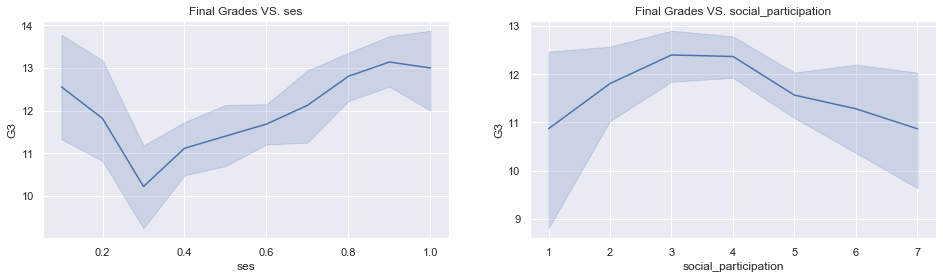

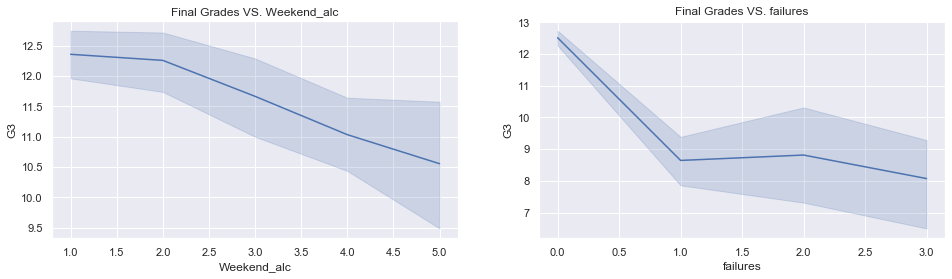

In [60]:
i = 0
check = True
_ , ax = plt.subplots(1,2, figsize=(16,4))
for col in ['ses','social_participation','Weekend_alc','failures']:
    x = col
    y = data.G3
    sns.lineplot(x=data[x], y=y, ax=ax[i]).set_title("Final Grades VS. " + col)
    i+=1
    if i == 2 and check:
        _ , ax = plt.subplots(1,2, figsize=(16,4))
        i = 0
        check = False

# Machine Learning

## Predicting Weekend Alcohol Usage

* The first thing that we want to look at is a student's social participation and their socioeconomic status. We have previously noted that there appears to be a high correlation between social participationa and weekend alcohol use, and a low correlation between a student's socioeconomic status and their weekend alcohol usage. In order to determine which, if any, are accurate predictors of alcohol usage, we will use some <a href="https://scikit-learn.org/stable/supervised_learning.html#supervised-learning">Sklearn Regression Models</a> that are already available. We have chosen to use a linear regression first, but you can choose whichever you feel best suits your analysis.

* Our first step now will be to split the data into training and testing sets, so we can see how well our predictor works. We will use our training sets to train the model, and then our testing set to test the model and compare its results to the results we already have. Luckily, sklearn already has something that will do this for us (If you want to learn more about this, see <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">here</a>)!

In [61]:
X_social = data[['social_participation']]
X_ses = data[['ses']]
y_alc = data['Weekend_alc']

X_train_social, X_test_social, y_train_social, y_test_social = train_test_split(X_social, y_alc, test_size=0.1)
X_train_ses, X_test_ses, y_train_ses, y_test_ses = train_test_split(X_ses,y_alc,test_size = 0.1)

Now that we're done with the preproccessing, we can get to actually looking at different models for predicting the data, beginning with linear regression. The first step when using a model is to train that model by fitting it to our training data. Then, we use the model to predict (using our testing data), what each student's alochol usage is. Finally, we compare these predicted values to the actual values that we know are correct. The difference between those values, or the <b><i>residuals</i></b>, is how far the predicted value is from the actual. Therefore, we want to the residuals to be as close to zero as possible, to show that our predictor is very accurate.

In [62]:
regr = linear_model.LinearRegression()
social_reg = regr.fit(X_train_social, y_train_social)
predictions1 = social_reg.predict(X_test_social).flatten()
residuals1 = y_test_social - predictions1

regr = linear_model.LinearRegression()
ses_reg = regr.fit(X_train_ses, y_train_ses)
predictions2 = ses_reg.predict(X_test_ses).flatten()
residuals2 = y_test_ses - predictions2

Text(0, 0.5, 'Residual')

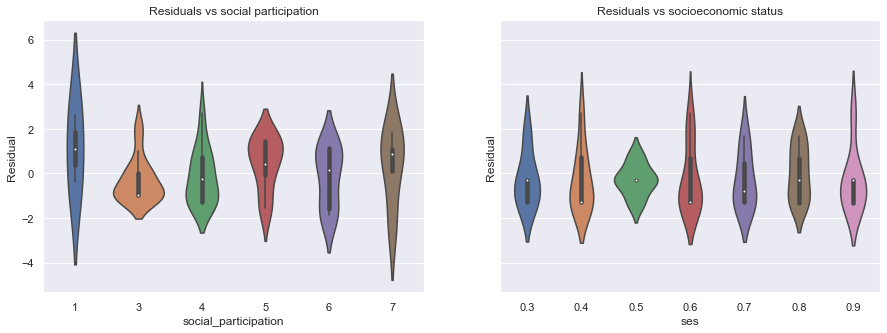

In [63]:
_, ax = plt.subplots(1, 2, figsize=(15, 5), sharey = True)
v = sns.violinplot(x='social_participation', y=residuals1, data=X_test_social, ax = ax[0])
v.set_title("Residuals vs social participation")
v.set_ylabel("Residual")

v = sns.violinplot(x='ses', y=residuals2, data=X_test_ses, ax = ax[1])
v.set_title("Residuals vs socioeconomic status")
v.set_ylabel("Residual")

We can clearly see from these plots that both social participation and socioeconomic status have residuals very close to zero and thus are good predictors of alcohol usage. We notice that using social participation clearly gives us residuals even closer to zero than socioeconmic status, as previously predicted. Now, let's look at weekday drinking, which we saw earlier appeared to have a high correlation to weekend drinking.

In [70]:
X_day = data[['Weekday_alc']]

X_train_day, X_test_day, y_train_day, y_test_day = train_test_split(X_day,y_alc,test_size = 0.10)

y_train_day = preprocessing.LabelEncoder().fit_transform(y_train_day)
y_test_day = preprocessing.LabelEncoder().fit_transform(y_test_day)

regr = linear_model.LinearRegression()
dalc_reg = regr.fit(X_train_day, y_train_day)
predictions = dalc_reg.predict(X_test_day).flatten()
residuals3 = y_test_day - predictions

Text(0, 0.5, 'Residual')

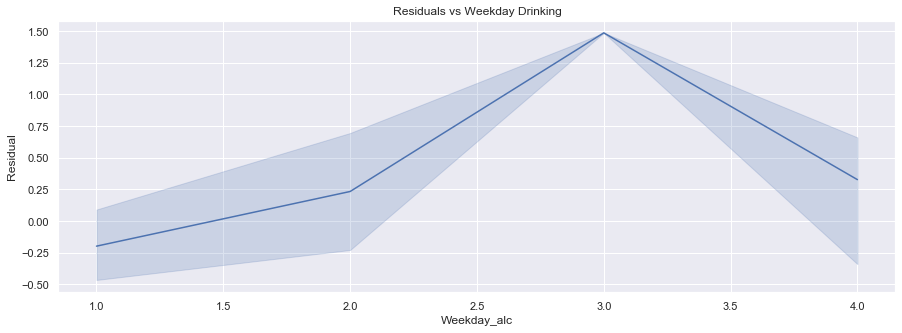

In [71]:
plt.subplots(figsize=(15, 5))
v = sns.lineplot(x='Weekday_alc', y=residuals3, data=X_test_day)
v.set_title("Residuals vs Weekday Drinking")
v.set_ylabel("Residual")

Again, we can see using weekday alcohol consumption as a predictor gives the lowest residual values yet.

Now let's compare the three predictors we've used, and see which actually gives us the most accurate results. We can do this by looking at the error values from each predictor, because the closest values to zero are the most accurate. We take the mean of each of the errors to see what the average residual value of each predictor is. We can do this using <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">cross_val_scores</a>, which finds the error for us.

In [72]:
socialScores = cross_val_score(social_reg,X_test_social,y_test_social,cv = 10)
sesScores = cross_val_score(ses_reg, X_test_ses, y_test_ses, cv=10)
dalcScores = cross_val_score(dalc_reg, X_test_day, y_test_day, cv=10)
print("Mean residual using social participation: ", np.mean(socialScores))
print("Mean residual using socioeconomic status: ", np.mean(sesScores))
print("Mean residual using weekday drinking: ", np.mean(dalcScores))

Mean residual using social participation:  -0.048560445238119296
Mean residual using socioeconomic status:  -0.08277008409982317
Mean residual using weekday drinking:  0.16677293250081543


All three have very low, very similar mean error squared. It is clear that weekday drinking is the lowest, which makes sense because people who drink on a weekday are certainly more likely to drink on a weekend. This is less important of a predictor because if we know a given student's alcohol consumption on weekdays, we likely already know their weekend alcohol consumption.
We can see that the coefficient for Social participation is the next lowest because it is actually the best predictor of alcohol usage that we compare about, so when predicting we will use the model trained with social participation as a predictor. Now that we have established this, we can look at other models from sklearn and see if any of them will do a better job at predicting (since different models work best with different kinds of data).

In [67]:
clfKNN = KNeighborsRegressor(n_neighbors=5)
clfTree = DecisionTreeRegressor(random_state = 0)

clfKNN.fit(X_train_social, y_train_social)
clfTree.fit(X_train_social,y_train_social)

KNN_residuals = clfKNN.predict(X_test_social) - y_test_social
Tree_residuals = clfTree.predict(X_test_social) - y_test_social

Text(0, 0.5, 'Residual')

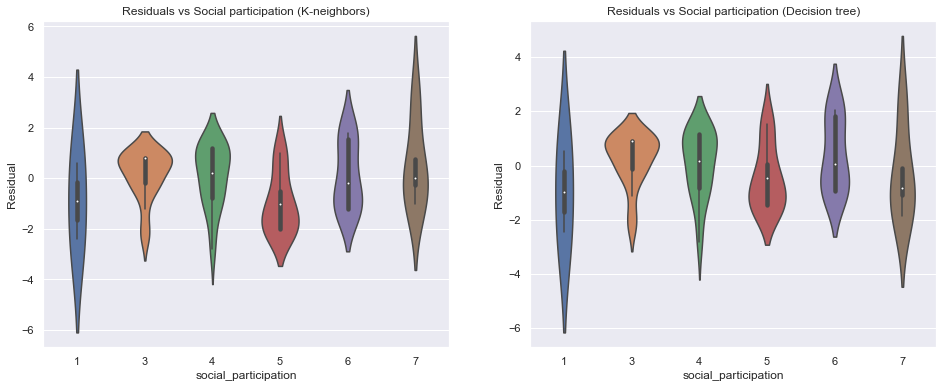

In [68]:
_, ax = plt.subplots(1, 2, figsize=(16, 6))
v = sns.violinplot(x='social_participation', y=KNN_residuals, data=X_test_social, ax = ax[0])
v.set_title("Residuals vs Social participation (K-neighbors)")
v.set_ylabel("Residual")

v = sns.violinplot(x='social_participation', y=Tree_residuals, data=X_test_social, ax=ax[1])
v.set_title("Residuals vs Social participation (Decision tree)")
v.set_ylabel("Residual")

We can see that using K-neighbors and Decision tree both also give us very small residual values. But, we want to know for sure which of the three models we used gave us the most accurate predictions, so we will compare their mean error.

In [69]:
linScores = cross_val_score(social_reg,X_test_social,y_test_social,cv = 10)
kNNScores = cross_val_score(clfKNN, X_test_social, y_test_social, cv=10)
treeScores = cross_val_score(clfTree, X_test_social, y_test_social, cv=10)
print("Mean using Linear Regression: ", np.mean(linScores))
print("Mean using K-neighbors: ", np.mean(kNNScores))
print("Mean using Decision tree: ", np.mean(treeScores))

Mean using Linear Regression:  -0.048560445238119296
Mean using K-neighbors:  -0.1931630882416961
Mean using Decision tree:  -0.22845225307681857


We can see that mean error of a decision tree is the closest to zero, although linear regression is very close. This means that of the three models we've used to predict weekend alcohol consumption, we can drop K nearest neighbors and focus on either linear regression or decision tree models, as those give the most accurate predictions. 

All of these residuals have shown us that our original hypothesis is correct, and social participation is an accurate predictor of alcohol consumption. In fact, social participation, socioeconomic status, and weekday drinking levels are all accurate predictors of weekend alcohol consumption; however, we were incorrect in that social participation is not the best predictor. However, as we predicted, it is the most important one, since it has the second highest correlation with alcohol consumption, and we disreagarded weekday alcohol consumption as a relevant predictor.

# Predicting Final Grades

In [73]:
X_social = data[['social_participation']]
X_alc = data[['Weekend_alc']]
X_ses = data[['ses']]
X_com = data[['social_participation','Weekend_alc','ses']]
y_grades = data['G3']

In [74]:
X_train_social, X_test_social, y_train_social, y_test_social = train_test_split(X_social, y_grades, test_size=0.33)
X_train_alc, X_test_alc, y_train_alc, y_test_alc = train_test_split(X_alc,y_grades,test_size = 0.33)
X_train_ses, X_test_ses, y_train_ses, y_test_ses = train_test_split(X_ses,y_grades,test_size = 0.33)
X_train_com, X_test_com, y_train_com, y_test_com = train_test_split(X_com,y_grades,test_size = 0.33)

In [75]:
# 
y_train_social = preprocessing.LabelEncoder().fit_transform(y_train_social)
y_test_social = preprocessing.LabelEncoder().fit_transform(y_test_social)
# 
y_train_alc = preprocessing.LabelEncoder().fit_transform(y_train_alc)
y_test_alc = preprocessing.LabelEncoder().fit_transform(y_test_alc)
#
y_train_ses = preprocessing.LabelEncoder().fit_transform(y_train_ses)
y_test_ses = preprocessing.LabelEncoder().fit_transform(y_test_ses)

In [76]:
# models for social
clfKNN = KNeighborsRegressor(n_neighbors=5)
clfTree = DecisionTreeRegressor(random_state = 0)
clfLin = LinearRegression()
# 
clfKNN.fit(X_train_social, y_train_social)
clfTree.fit(X_train_social,y_train_social)
clfLin.fit(X_train_social,y_train_social)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
kNNScores = cross_val_score(clfKNN, X_test_social, y_test_social, cv=10)
treeScores = cross_val_score(clfTree, X_test_social, y_test_social, cv=10)
linScores = cross_val_score(clfLin,X_test_social,y_test_social, cv = 10)
print("kNN Mean: " + str(np.mean(kNNScores)))
print("tree Mean: "+ str(np.mean(treeScores)))
print("lin Mean: " + str(np.mean(linScores)))

kNN Mean: -0.3826883280474668
tree Mean: -0.1154746779293693
lin Mean: -0.07993995848321542


In [78]:
kNNPredictSocial = clfKNN.predict(X_test_social)
kNNResidualsSocial = y_test_social - kNNPredictSocial
treePredictSocial = clfTree.predict(X_test_social)
treeResidualsSocial = y_test_social - treePredictSocial
linPredictSocial = clfLin.predict(X_test_social)
linResidualsSocial = y_test_social - linPredictSocial

In [79]:
clfKNN = clone(clfKNN)
clfTree = clone(clfTree)
clfLin = clone(clfLin)

clfKNN.fit(X_train_alc, y_train_alc)
clfTree.fit(X_train_alc,y_train_alc)
clfLin.fit(X_train_alc,y_train_alc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
kNNScores = cross_val_score(clfKNN, X_test_alc, y_test_alc, cv=10)
treeScores = cross_val_score(clfTree, X_test_alc, y_test_alc, cv=10)
linScores = cross_val_score(clfLin,X_test_alc,y_test_alc,cv = 10)
print("kNN Mean: " + str(np.mean(kNNScores)))
print("tree Mean: "+ str(np.mean(treeScores)))
print("lin Mean: " + str(np.mean(linScores)))

kNN Mean: -0.4154824719994685
tree Mean: -0.03847153300473359
lin Mean: -0.012788927407532869


In [81]:
kNNPredictAlc = clfKNN.predict(X_test_alc)
kNNResidualsAlc = y_test_alc - kNNPredictAlc
treePredictAlc = clfTree.predict(X_test_alc)
treeResidualsAlc = y_test_alc - treePredictAlc
linPredictAlc = clfLin.predict(X_test_alc)
linResidualsAlc = y_test_alc - linPredictAlc

In [82]:
clfKNN = clone(clfKNN)
clfTree = clone(clfTree)
clfLin = clone(clfLin)

clfKNN.fit(X_train_ses, y_train_ses)
clfTree.fit(X_train_ses,y_train_ses)
clfLin.fit(X_train_ses,y_train_ses)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
kNNScores = cross_val_score(clfKNN, X_test_ses, y_test_ses, cv=10)
treeScores = cross_val_score(clfTree, X_test_ses, y_test_ses, cv=10)
linScores = cross_val_score(clfLin,X_test_ses,y_test_ses, cv = 10)
print("kNN Mean: " + str(np.mean(kNNScores)))
print("tree Mean: "+ str(np.mean(treeScores)))
print("lin Mean: " + str(np.mean(linScores)))

kNN Mean: -0.21842901190021874
tree Mean: -0.05527482623229239
lin Mean: -0.0332586766893009


In [84]:
kNNPredictSes = clfKNN.predict(X_test_ses)
kNNResidualsSes = y_test_ses - kNNPredictSes
treePredictSes = clfTree.predict(X_test_ses)
treeResidualsSes = y_test_ses - treePredictSes
linPredictSes = clfLin.predict(X_test_ses)
linResidualsSes = y_test_ses - linPredictSes

In [85]:
clfKNN = clone(clfKNN)
clfTree = clone(clfTree)
clfLin = clone(clfLin)

clfKNN.fit(X_train_com, y_train_com)
clfTree.fit(X_train_com,y_train_com)
clfLin.fit(X_train_com,y_train_com)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
kNNScores = cross_val_score(clfKNN, X_test_com, y_test_com, cv=10)
treeScores = cross_val_score(clfTree, X_test_com, y_test_com, cv=10)
linScores = cross_val_score(clfLin,X_test_com,y_test_com, cv = 10)
print("kNN Mean: " + str(np.mean(kNNScores)))
print("tree Mean: "+ str(np.mean(treeScores)))
print("lin Mean: " + str(np.mean(linScores)))

kNN Mean: -0.3074534282399627
tree Mean: -1.4852410003340495
lin Mean: -0.059419128958271505


In [87]:
kNNPredictCom = clfKNN.predict(X_test_com)
kNNResidualsCom = y_test_com - kNNPredictCom
treePredictCom = clfTree.predict(X_test_com)
treeResidualsCom = y_test_com - treePredictCom
linPredictCom = clfLin.predict(X_test_com)
linResidualsCom = y_test_com - linPredictCom

Text(0.5, 0, 'combined')

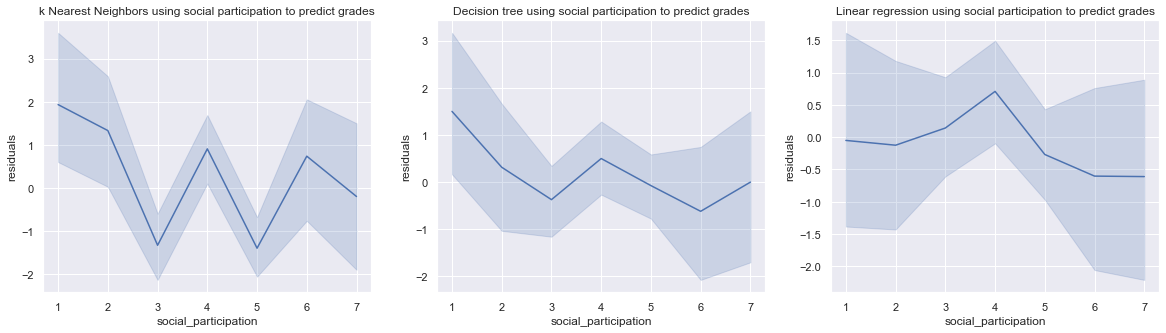

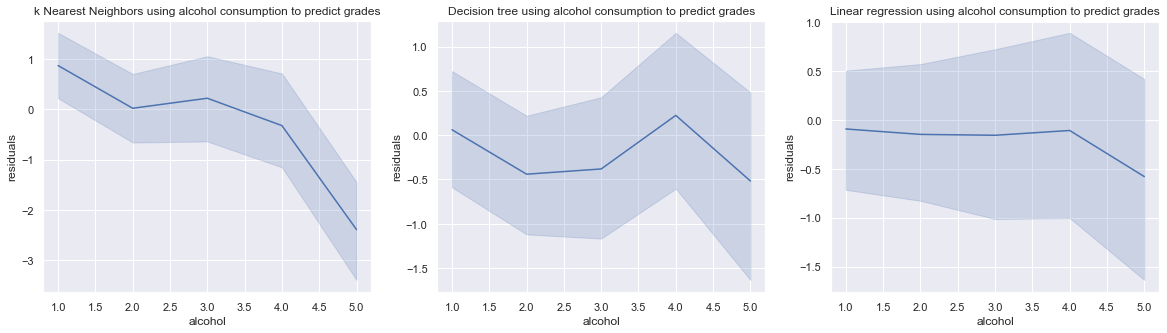

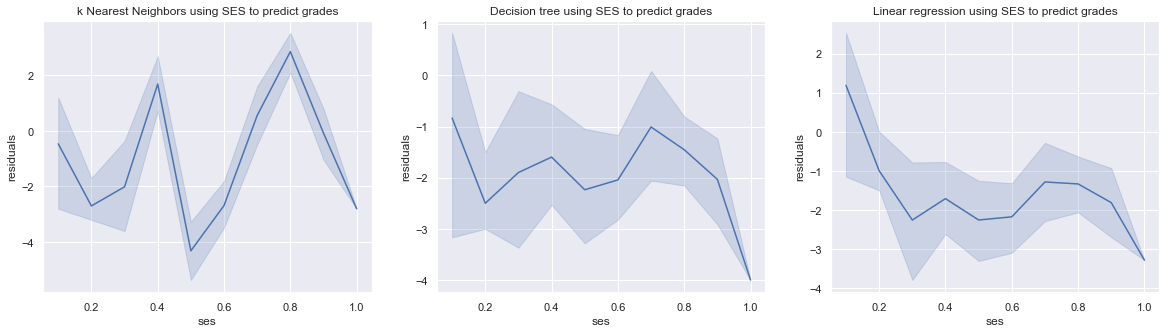

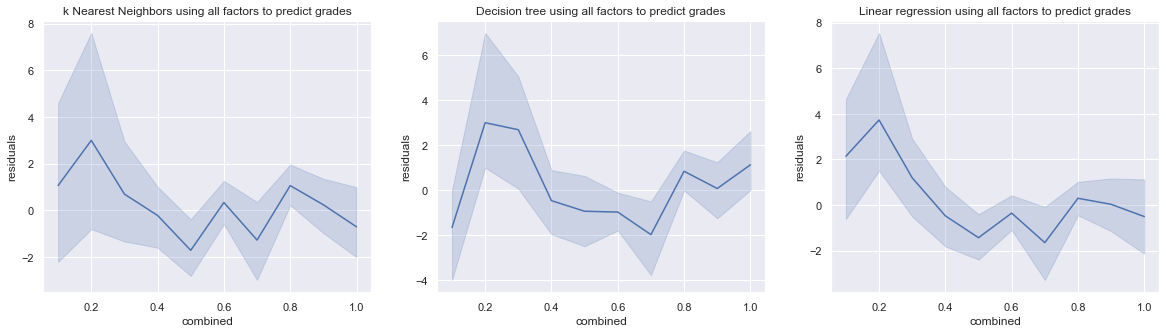

In [88]:
_ , ax = plt.subplots(1,3, figsize=(20,5))
plot = sns.lineplot(x='social_participation', y=kNNResidualsSocial, data=X_test_social, ax = ax[0])
plot.set_title("k Nearest Neighbors using social participation to predict grades")
plot.set_ylabel('residuals')
plot.set_xlabel('social_participation')

plot = sns.lineplot(x='social_participation', y=treeResidualsSocial, data=X_test_social, ax = ax[1])
plot.set_title("Decision tree using social participation to predict grades")
plot.set_ylabel('residuals')
plot.set_xlabel('social_participation')

plot = sns.lineplot(x='social_participation', y=linResidualsSocial, data=X_test_social, ax = ax[2])
plot.set_title("Linear regression using social participation to predict grades")
plot.set_ylabel('residuals')
plot.set_xlabel('social_participation')

_ , ax = plt.subplots(1,3, figsize=(20,5))
plot = sns.lineplot(x='Weekend_alc', y=kNNResidualsAlc, data=X_test_alc, ax = ax[0])
plot.set_title("k Nearest Neighbors using alcohol consumption to predict grades")
plot.set_ylabel('residuals')
plot.set_xlabel('alcohol')

plot = sns.lineplot(x='Weekend_alc', y=treeResidualsAlc, data=X_test_alc, ax = ax[1])
plot.set_title("Decision tree using alcohol consumption to predict grades")
plot.set_ylabel('residuals')
plot.set_xlabel('alcohol')

plot = sns.lineplot(x='Weekend_alc', y=linResidualsAlc, data=X_test_alc, ax = ax[2])
plot.set_title("Linear regression using alcohol consumption to predict grades")
plot.set_ylabel('residuals')
plot.set_xlabel('alcohol')

_ , ax = plt.subplots(1,3, figsize=(20,5))
plot =sns.lineplot(x='ses', y=kNNResidualsSes, data=X_test_ses, ax = ax[0])
plot.set_title("k Nearest Neighbors using SES to predict grades")
plot.set_ylabel('residuals')
plot.set_xlabel('ses')

plot = sns.lineplot(x='ses', y=treeResidualsSes, data=X_test_ses, ax = ax[1])
plot.set_title("Decision tree using SES to predict grades")
plot.set_ylabel('residuals')
plot.set_xlabel('ses')

plot = sns.lineplot(x='ses', y=linResidualsSes, data=X_test_ses, ax = ax[2])
plot.set_title("Linear regression using SES to predict grades")
plot.set_ylabel('residuals')
plot.set_xlabel('ses')

_ , ax = plt.subplots(1,3, figsize=(20,5))
plot = sns.lineplot(x='ses', y=kNNResidualsCom, data=X_test_com, ax = ax[0])
plot.set_title("k Nearest Neighbors using all factors to predict grades")
plot.set_ylabel('residuals')
plot.set_xlabel('combined')

plot = sns.lineplot(x='ses', y=treeResidualsCom, data=X_test_com, ax = ax[1])
plot.set_title("Decision tree using all factors to predict grades")
plot.set_ylabel('residuals')
plot.set_xlabel('combined')

plot = sns.lineplot(x='ses', y=linResidualsCom, data=X_test_com, ax = ax[2])
plot.set_title("Linear regression using all factors to predict grades")
plot.set_ylabel('residuals')
plot.set_xlabel('combined')

Text(0.5, 0, 'actual')

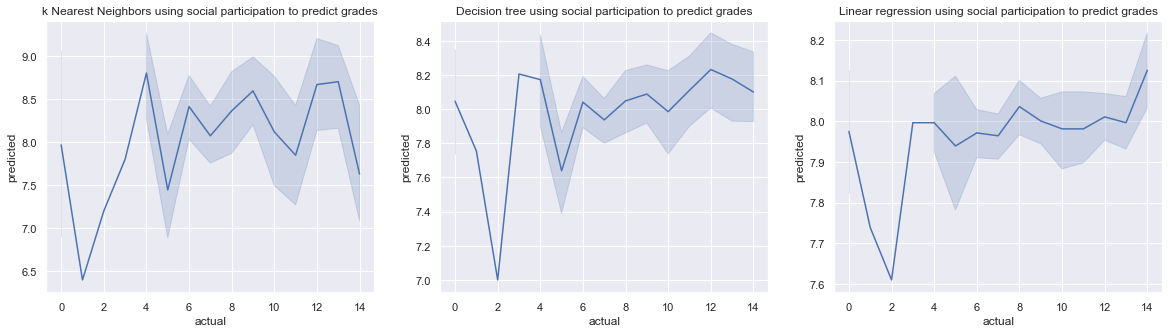

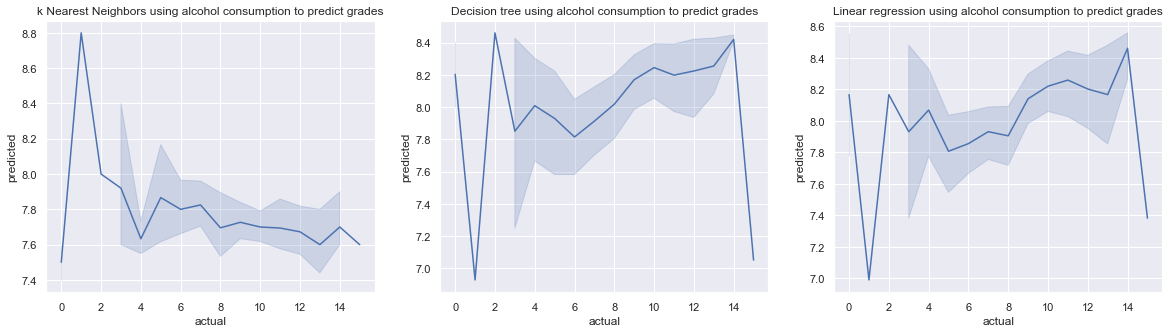

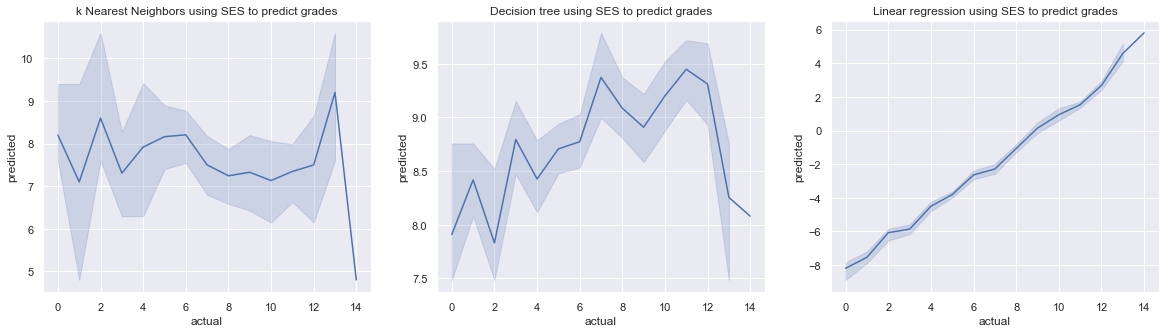

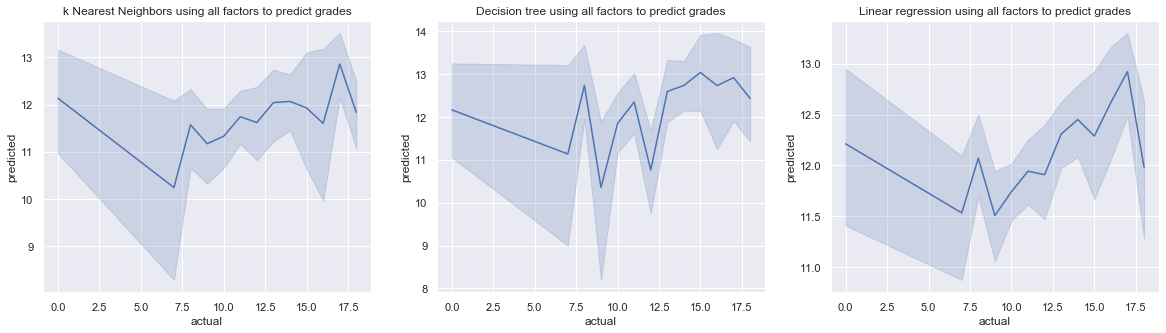

In [90]:
_ , ax = plt.subplots(1,3, figsize=(20,5))
plot = sns.scatterplot(x=y_test_social, y=kNNPredictSocial, ax = ax[0])
plot.set_title("k Nearest Neighbors using social participation to predict grades")
plot.set_ylabel('predicted')
plot.set_xlabel('actual')

plot = sns.scatterplot(x=y_test_social, y=treePredictSocial, ax = ax[1])
plot.set_title("Decision tree using social participation to predict grades")
plot.set_ylabel('predicted')
plot.set_xlabel('actual')

plot = sns.scatterplot(x=y_test_social, y=linPredictSocial, ax = ax[2])
plot.set_title("Linear regression using social participation to predict grades")
plot.set_ylabel('predicted')
plot.set_xlabel('actual')

_ , ax = plt.subplots(1,3, figsize=(20,5))
plot = sns.scatterplot(x=y_test_alc, y=kNNPredictAlc, ax = ax[0])
plot.set_title("k Nearest Neighbors using alcohol consumption to predict grades")
plot.set_ylabel('predicted')
plot.set_xlabel('actual')

plot =sns.scatterplot(x=y_test_alc, y=treePredictAlc, ax = ax[1])
plot.set_title("Decision tree using alcohol consumption to predict grades")
plot.set_ylabel('predicted')
plot.set_xlabel('actual')

plot = sns.scatterplot(x=y_test_alc, y=linPredictAlc, ax = ax[2])
plot.set_title("Linear regression using alcohol consumption to predict grades")
plot.set_ylabel('predicted')
plot.set_xlabel('actual')

_ , ax = plt.subplots(1,3, figsize=(20,5))
plot = sns.scatterplot(x=y_test_ses, y=kNNPredictSes, ax = ax[0])
plot.set_title("k Nearest Neighbors using SES to predict grades")
plot.set_ylabel('predicted')
plot.set_xlabel('actual')

plot =sns.scatterplot(x=y_test_ses, y=treePredictSes, ax = ax[1])
plot.set_title("Decision tree using SES to predict grades")
plot.set_ylabel('predicted')
plot.set_xlabel('actual')

plot =sns.scatterplot(x=y_test_ses, y=linResidualsSes, ax = ax[2])
plot.set_title("Linear regression using SES to predict grades")
plot.set_ylabel('predicted')
plot.set_xlabel('actual')

_ , ax = plt.subplots(1,3, figsize=(20,5))
plot = sns.scatterplot(x=y_test_com, y=kNNPredictCom, ax = ax[0])
plot.set_title("k Nearest Neighbors using all factors to predict grades")
plot.set_ylabel('predicted')
plot.set_xlabel('actual')

plot = sns.scatterplot(x=y_test_com, y=treePredictCom, ax = ax[1])
plot.set_title("Decision tree using all factors to predict grades")
plot.set_ylabel('predicted')
plot.set_xlabel('actual')

plot = sns.scatterplot(x=y_test_com, y=linPredictCom, ax = ax[2])
plot.set_title("Linear regression using all factors to predict grades")
plot.set_ylabel('predicted')
plot.set_xlabel('actual')

# Conclusions and Future Research

As you can see, our hypothesis that "students who are more social will also be more likely to drink more, while students with better upbringing will achieve higher grades" has been shown to be accurate. We showed this through both correlations and machine learning algorithims.
More importantly, this research can be used to make beneficial policy decisions that can benefit the greater good. For example, schools may want to increase funding for anti-drinking campaigns. We clearly see that students who drink less also have better grades. Maybe schools could put posters in every classroom with some of the actual charts pictured above, to give students a visual understanding of the very real effect alcohol has on the students grades. With that being said, we still need to be cautious as high correlation does not necessarily imply causality.